<p align="center" style="font-size:35px; font-weight:bold; margin-bottom:0;">
  CodeAlpha Internship Program
</p>
<p align="center" style="font-size:29px; font-style:italic; margin-top:0; margin-bottom:0;">
  TASK: Credit Scoring Model – Predicting Loan Default
</p>
<p align="center" style="font-size:27px; margin-top:8px;">
  <strong>GitHub Repository</strong> – <a href="https://github.com/AhmedLabib1/CodeAlpha_MachineLearning_Internship">Link to GitHub Repository</a>
</p>

## **Introduction**

This project focuses on building a credit scoring model to predict whether a loan applicant will default. The dataset contains various features related to personal, financial, and credit history information. Accurate prediction of default risk helps financial institutions make informed lending decisions and reduce potential losses. The workflow involves data preprocessing, exploratory data analysis (EDA), model training, evaluation, and interpretation.

---

## **Feature Descriptions**

| Feature                        | Description |
|-------------------------------|-------------|
| **age**                  | Age of the loan applicant in years. |
| **annual_income**              | Annual income of the applicant. |
| **home_ownership**      | Type of home ownership (e.g., Rent, Own, Mortgage). |
| **employment_length**          | Number of years the applicant has been employed. |
| **loan_purpose**                | Stated purpose of the loan (e.g., education, medical, personal). |
| **grade**                 | Credit grade assigned to the loan (e.g., A to G). |
| **loan_amount**                  | Total loan amount requested by the applicant. |
| **interest_rate**              | Interest rate charged on the loan. |
| **default**                | Target variable; indicates whether the loan was defaulted (1) or no(0). |
| **loan_to_income_ratio**        | Ratio of loan amount to the applicant’s income. |
| **has_prior_default**  | Indicates whether the applicant has a prior default recorded in the credit bureau. |
| **credit_history_length** | Length of the applicant's credit history in years. |

---

## **Objectives**

- Handle missing values and prepare the dataset for modeling
- Explore feature distributions and relationships through EDA
- Train and evaluate multiple classification models
- Interpret results and assess the best-performing model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, auc)

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

np.random.seed(42)
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Dataset/credit_risk_dataset.csv')

df.rename(columns={
    'person_age': 'age',
    'person_income': 'annual_income',
    'person_home_ownership': 'home_ownership',
    'person_emp_length': 'employment_length',
    'loan_intent': 'loan_purpose',
    'loan_grade': 'grade',
    'loan_amnt': 'loan_amount',
    'loan_int_rate': 'interest_rate',
    'loan_status': 'default',
    'loan_percent_income': 'loan_to_income_ratio',
    'cb_person_default_on_file': 'has_prior_default',
    'cb_person_cred_hist_length': 'credit_history_length'
}, inplace=True)

df.head(10)

,age,annual_income,home_ownership,employment_length,loan_purpose,grade,loan_amount,interest_rate,default,loan_to_income_ratio,has_prior_default,credit_history_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


## ***EDA & Preprocessing***

In [3]:
# Generate the profiling report for your dataframe 'df'
profile = ProfileReport(df, title="Credit Scoring Data Profiling Report", explorative=True)

# Or to save it as an HTML file
profile.to_file("credit_scoring_data_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 297.93it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    32581 non-null  int64  
 1   annual_income          32581 non-null  int64  
 2   home_ownership         32581 non-null  object 
 3   employment_length      31686 non-null  float64
 4   loan_purpose           32581 non-null  object 
 5   grade                  32581 non-null  object 
 6   loan_amount            32581 non-null  int64  
 7   interest_rate          29465 non-null  float64
 8   default                32581 non-null  int64  
 9   loan_to_income_ratio   32581 non-null  float64
 10  has_prior_default      32581 non-null  object 
 11  credit_history_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
# Check for missing values
df.isnull().sum()

# Handle missing values
df = df.dropna(subset=['employment_length'])
df['interest_rate'].fillna(df['interest_rate'].median(), inplace=True)

In [6]:
# Check for duplicated rows
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [7]:
# Apply log transformation to reduce right skewness in annual_income
df['annual_income'] = np.log1p(df['annual_income'])

## ***Visualization***

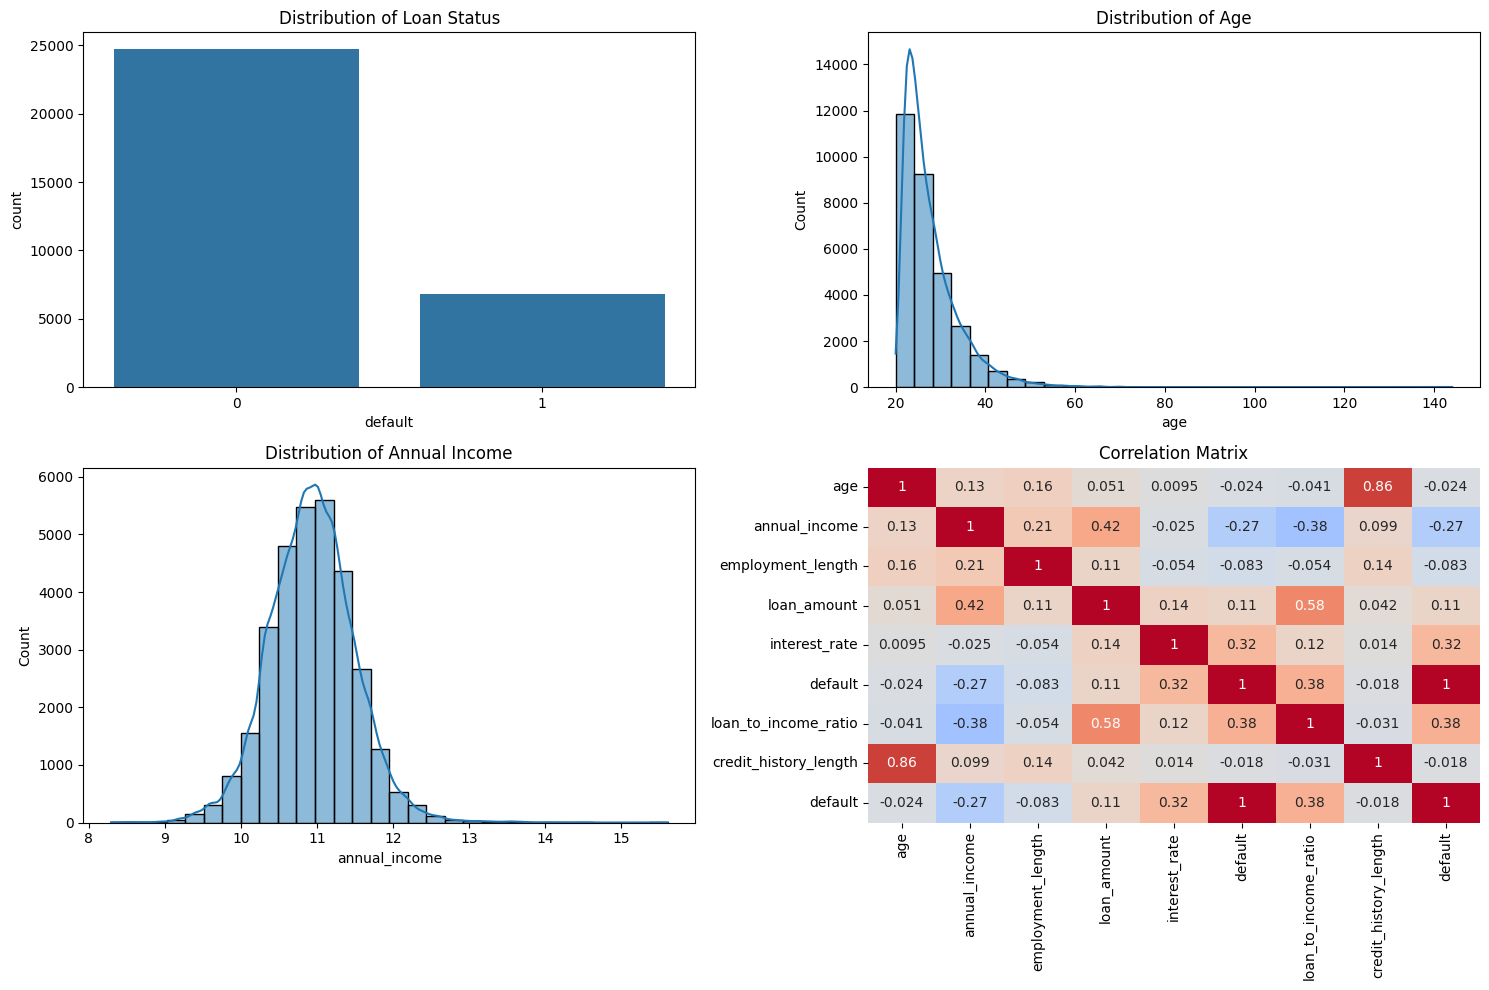

In [8]:
# Set up the figure with 4 subplots (2x2)
plt.figure(figsize=(15, 10))

# 1. Distribution of default
plt.subplot(2, 2, 1)
sns.countplot(x='default', data=df)
plt.title('Distribution of Loan Status')

# 2. Distribution of age
plt.subplot(2, 2, 2)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')

# 3. Distribution of annual income
plt.subplot(2, 2, 3)
sns.histplot(df['annual_income'], bins=30, kde=True)
plt.title('Distribution of Annual Income')

# 4. Correlation matrix heatmap instead of scatterplot
plt.subplot(2, 2, 4)
num_cols = [col for col in df.columns if df[col].dtype != 'object']
corr_matrix = df[num_cols + ['default']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, cbar=False)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()


## ***Feature Engineering***

In [9]:
# Debt-to-Income Ratio
df['debt_to_income'] = df['loan_amount'] / df['annual_income']

# Monthly Interest Payment
df['monthly_int_payment'] = (df['loan_amount'] * df['interest_rate'] / 100) / 12

# Age Groups
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 30, 40, 50, 60, 100],
                         labels=['<30', '30-40', '40-50', '50-60', '60+'])

# Income Groups
df['income_group'] = pd.cut(df['annual_income'],
                            bins=[0, 30000, 50000, 75000, 100000, 200000],
                            labels=['<30k', '30-50k', '50-75k', '75-100k', '100k+'])

df[['debt_to_income', 'monthly_int_payment', 'age_group', 'income_group']].head()


,debt_to_income,monthly_int_payment,age_group,income_group
0,3186.073133,467.250000,<30,<30k
1,109.055743,9.283333,<30,<30k
2,599.806587,58.987500,<30,<30k
3,3156.047422,444.208333,<30,<30k
4,3209.790686,416.208333,<30,<30k


## ***Handling Categorical Features***

In [10]:
df['has_prior_default'] = df['has_prior_default'].map({'Y': 1, 'N': 0})

encoders = {}

# Label encoding for ordinal/categorical features
le_cols = ['grade', 'age_group', 'income_group']
for col in le_cols:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    encoders[col] = le  # store the encoder

# One-Hot Encoding for nominal features
oh_cols = ['home_ownership', 'loan_purpose']
df = pd.get_dummies(df, columns=oh_cols, drop_first=True, dtype=int)

# Drop original categorical columns
df.drop(['grade', 'age_group', 'income_group'], axis=1, inplace=True)

# Save the encoders to a pickle file
with open('models/encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

## ***Prepare Data for Modeling***

In [11]:
# Define features and target
X = df.drop('default', axis=1)
y = df['default']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle imbalancing in target feature
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [12]:
y_train.value_counts()

default
0    19777
1     5446
Name: count, dtype: int64

## **Model Building and Evaluation**

In [14]:
# Define models and hyperparameter grids
model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.1, 1.0, 10.0],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20]
        }
    }
}


Evaluating model: Logistic Regression
Best Parameters: {'C': 1.0, 'solver': 'lbfgs'}
Accuracy: 0.8433
Precision: 0.7125
Recall: 0.4604
F1 Score: 0.5593
ROC AUC: 0.8534


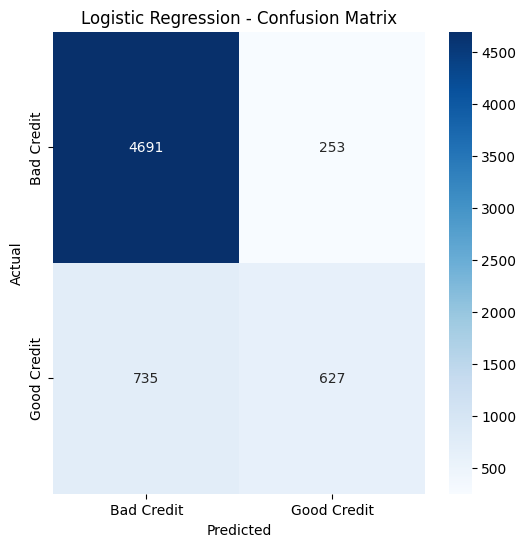

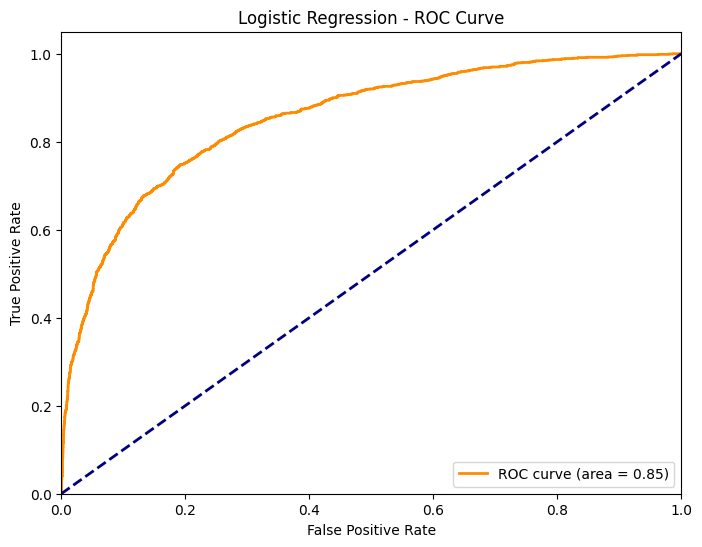


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4944
           1       0.71      0.46      0.56      1362

    accuracy                           0.84      6306
   macro avg       0.79      0.70      0.73      6306
weighted avg       0.83      0.84      0.83      6306

Evaluating model: Decision Tree
Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
Accuracy: 0.9269
Precision: 0.9500
Recall: 0.6982
F1 Score: 0.8049
ROC AUC: 0.9103


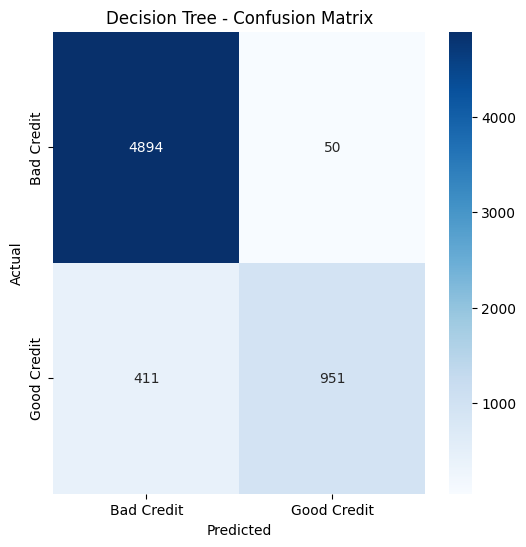

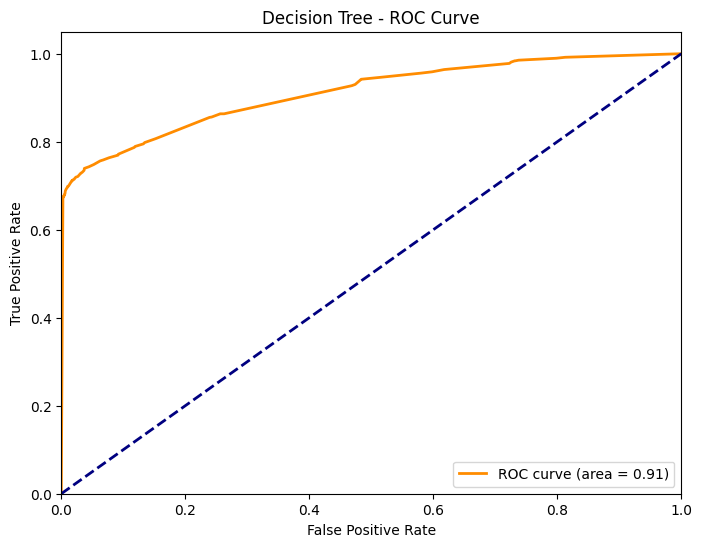


Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      4944
           1       0.95      0.70      0.80      1362

    accuracy                           0.93      6306
   macro avg       0.94      0.84      0.88      6306
weighted avg       0.93      0.93      0.92      6306

Evaluating model: Random Forest
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Accuracy: 0.9317
Precision: 0.9604
Recall: 0.7129
F1 Score: 0.8184
ROC AUC: 0.9308


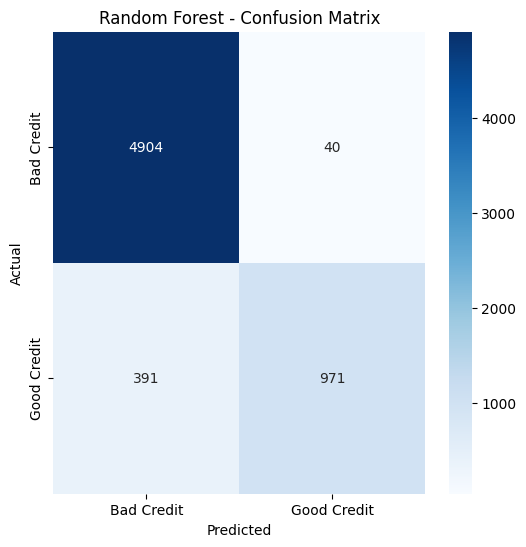

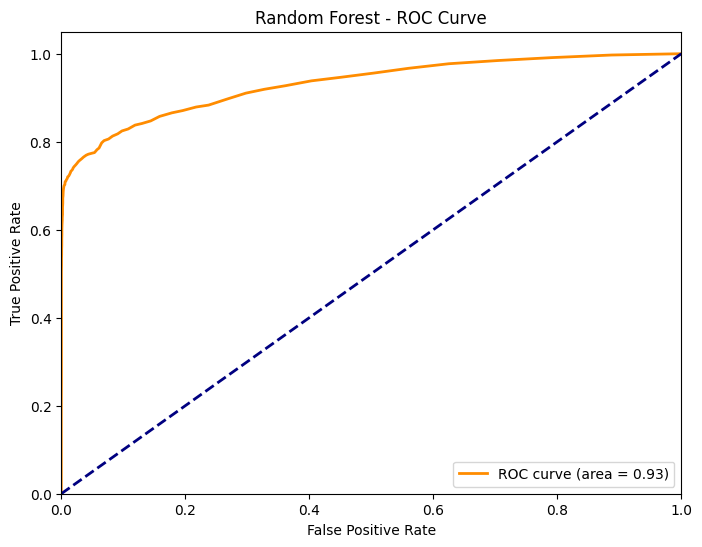


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4944
           1       0.96      0.71      0.82      1362

    accuracy                           0.93      6306
   macro avg       0.94      0.85      0.89      6306
weighted avg       0.93      0.93      0.93      6306



In [16]:
for name, config in model_params.items():
    print(f"Evaluating model: {name}")
    
    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Print metrics
    print(f"Best Parameters: {grid.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Bad Credit', 'Good Credit'], 
                yticklabels=['Bad Credit', 'Good Credit'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} - Confusion Matrix')
    plt.savefig(f'images/{name}_confusion_matrix.png')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})', color='darkorange', lw=2)
    plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.savefig(f'images/{name}_roc_curve.png')
    plt.show()

    # Classification Report
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    print("="*60)


#### ***Best accuracy for Random Forest, so i will consider it the main model***

#### ***Pickling the model***

In [17]:
RandomForest = RandomForestClassifier(n_estimators=100, max_depth=None)
RandomForest.fit(X_train, y_train)

with open('models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(RandomForest, f)